### 2) Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

**When should it be used? 

**It assumes that the data are missing completely at random(MCAR)**

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df['Age'].isnull().sum()

177

### Let's see how Random Sample Imputation works:

In [5]:
df['Age'].dropna()

## dropna() removes the missing values. and in o/p we get only those datset which don't have any NaN value.

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [6]:
## To check how many Nan values in Age column:

df['Age'].isnull().sum()

177

## Working of Random Sample Imputation method:-
*  So, we are basically picking up 177 samples from df['Age'] 
* Why I am picking 177 data because in Age We have 177 null values.
* And we are picking up these at random by giving random_state=0, Suppose if we give random_state=1.. Again o/p will be different for all those 177 NaN filling values.

In [7]:
#code:

df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
# To know which Age values (indexes) are having Null values:

df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
## Now, Let's see how it works with impute_nan function:

In [9]:
## impute_nan function with help of median:

def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    
    ##It will have the random sample to fill the na
    ## Here I will get 177 values in my variable:random_sample
    
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    # Now usning above 177 values in my variable:random_sample----->>>
    
    ##pandas need to have same index in order to merge the dataset
    
    random_sample.index=df[df[variable].isnull()].index # I'll get all the indexes where null present.
                                                        # And all these indexes are put with the random_sample's indexes.
        
    # Now, In below line we are just replacing the nan values with this random_sample.
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [10]:
# How can we find out median:

median=df.Age.median()

In [11]:
median

28.0

In [12]:
## Call the impute_nan function by passing the values:

impute_nan(df,"Age",median)

In [17]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


##

* Now, In above o/p we got two new columns as Age_median, Age_random (we created these in impute_nan function)

* Now, We can see that the NaN rows (say 5th row) is now replaced with median value in both the new columns Age_median & Age_random
* we see in 19th row NaN replaced with: Age_median and Age_random and both are having different value.
* So there is not such that both Age_median & Age_random should equal they may equal for some rows but there are difference in maximum rows That's why the plot is also different for both Age_median  & Age_random

In [15]:
# Now, Let's see the plot:

# And compare both Age_median & Age_random curve:

import matplotlib.pyplot as plt
%matplotlib inline

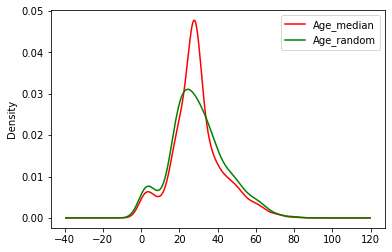

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. **Every situation randomness wont work** :
  * It means that when we have huge dataset at that time if you select different different random_state values at that time this may not work.

## 3) Capturing NAN values with a new feature:

It works well if the data are not missing completely at random 

In [18]:
# Again taking the dataframe by reading only three columns 'Age','Fare','Survived':

df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
import numpy as np

# Based on the existing  feature 'Age' I'm creating a new feature 'Age_NAN' which will be having zeros and ones.
# ie. Whereever there is a null there will be 1, else when there is no null then 0.\


df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [20]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [21]:
# Finding out the median of 'Age':

df.Age.median()

28.0

In [44]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [46]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## 
**So Basically there are 2 steps :**
 * 1st step is when u r capturing a NAN value in feature 'Age' then u first create a new features 'Age_NAN' (which is representing null as 1 non null as 0).
 * 
 * And after this I'm replacing these NAN values with median.
 

#### Advantages
1. Easy to implement
2. Captures the importance of missing values

#### Disadvantages
1. Creating Additional Features(**Curse of Dimensionality**):
   * It means suppose I'm just a normal human being If some one ask me hoe much the apartment cost in varanasi I'll say aprrox 30 Lakhs If it is balcony side then again price will increase. 
   * ie. As we keep on addding more and more features ur model gets sometimes confused to understand and to predict what may be the final output.
   * So, after some limit we should not give features more n more.
   * therefore awhenever thre is curse of dimensionality we remove Features (also called as Feature Selection).

### 4) End of Distribution imputation :-

In [22]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

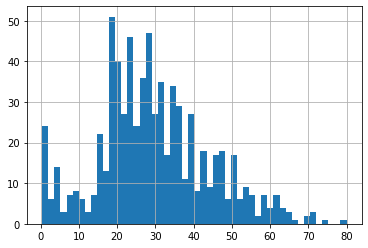

In [23]:
# Drawing Histogram for "Age":

df.Age.hist(bins=50)

In [24]:
# Finding out extreme value:

extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

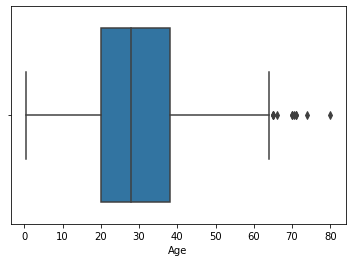

In [25]:
# Drawing Box Plot for Age:

import seaborn as sns
sns.boxplot('Age',data=df)

# We can see outliers.

In [26]:
# I'm creating a impute_nan function and i'm using 'extreme' value to fill nan.

def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [27]:
# Passing the arguments values in impute_nan function:

impute_nan(df,'Age',df.Age.median(),extreme)

In [28]:
df.head(10)

# We can see the 5th row, having NaN is now replaced with new value of extreme (73.27) in Age_end_distribution col.

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

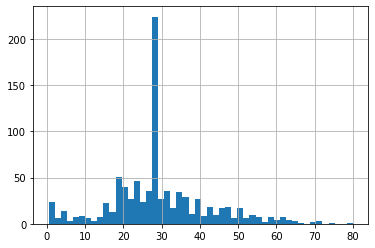

In [30]:
# Now If I plot a histogram for Age:

df['Age'].hist(bins=50)

<AxesSubplot:>

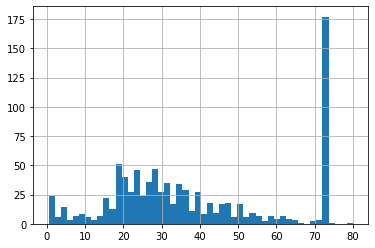

In [31]:
# Now If I plot a histogram for 'Age_end_distribution' :

df['Age_end_distribution'].hist(bins=50)

## ie. We can see that the "extreme" value has been populated.



C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

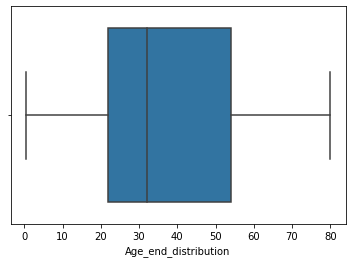

In [32]:
# Now If I see box plot ..Do I see any outliers now??
# NO (bcs outliers are getting covered bcs most of the points are filled or populated with "extreme")

sns.boxplot('Age_end_distribution',data=df)